In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

pd.set_option('display.max_columns', None)

In [2]:
#Remover acidentes que nao interessam na frança (queremos ter o mesmo espaço temporal logo eliminar todos de 2014 para cima)
accidentsFR = pd.read_csv('FR\\caracteristics.csv', sep=',', encoding='latin1')
accidentsFR = accidentsFR.drop(accidentsFR[accidentsFR.an > 14].index)

c:\users\asilva\appdata\local\programs\python\python38\lib\site-packages\IPython\core\interactiveshell.py:3169: DtypeWarning: Columns (14) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
#Ler
accidentsUK = pd.read_csv('UK\\Accidents0514.csv', sep=',')
personsUK = pd.read_csv('UK\\Casualties0514.csv', sep=',')
vehiclesUK = pd.read_csv('UK\\Vehicles0514.csv', sep=',')

placesFR = pd.read_csv('FR\\places.csv', sep=',')
personsFR = pd.read_csv('FR\\users.csv', sep=',')
vehiclesFR = pd.read_csv('FR\\vehicles.csv', sep=',')

c:\users\asilva\appdata\local\programs\python\python38\lib\site-packages\IPython\core\interactiveshell.py:3169: DtypeWarning: Columns (31) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
c:\users\asilva\appdata\local\programs\python\python38\lib\site-packages\IPython\core\interactiveshell.py:3169: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [4]:
#Juntar tabelas so para facilitar a leitura dos campos (para trabalhar usar as tabelas separadas)
uk = pd.merge(accidentsUK, personsUK, left_on='Accident_Index', right_on='Accident_Index', how='left')
uk = pd.merge(uk, vehiclesUK, left_on='Accident_Index', right_on='Accident_Index', how='left')

fr = pd.merge(accidentsFR, placesFR, left_on='Num_Acc', right_on='Num_Acc', how='left')
fr = pd.merge(fr, personsFR, left_on='Num_Acc', right_on='Num_Acc', how='left')
fr = pd.merge(fr, vehiclesFR, left_on='Num_Acc', right_on='Num_Acc', how='left')

In [5]:
uk.head()

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,Time,Local_Authority_(District),Local_Authority_(Highway),1st_Road_Class,1st_Road_Number,Road_Type,Speed_limit,Junction_Detail,Junction_Control,2nd_Road_Class,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Vehicle_Reference_x,Casualty_Reference,Casualty_Class,Sex_of_Casualty,Age_of_Casualty,Age_Band_of_Casualty,Casualty_Severity,Pedestrian_Location,Pedestrian_Movement,Car_Passenger,Bus_or_Coach_Passenger,Pedestrian_Road_Maintenance_Worker,Casualty_Type,Casualty_Home_Area_Type,Vehicle_Reference_y,Vehicle_Type,Towing_and_Articulation,Vehicle_Manoeuvre,Vehicle_Location-Restricted_Lane,Junction_Location,Skidding_and_Overturning,Hit_Object_in_Carriageway,Vehicle_Leaving_Carriageway,Hit_Object_off_Carriageway,1st_Point_of_Impact,Was_Vehicle_Left_Hand_Drive?,Journey_Purpose_of_Driver,Sex_of_Driver,Age_of_Driver,Age_Band_of_Driver,Engine_Capacity_(CC),Propulsion_Code,Age_of_Vehicle,Driver_IMD_Decile,Driver_Home_Area_Type
0,200501BS00001,525680.0,178240.0,-0.191170,51.489096,1,2,1,1,04/01/2005,3,17:42,12,E09000020,3,3218,6,30,0,-1,-1,0,0,1,1,2,2,0,0,1,1,E01002849,1,1,3,1,37,7,2,1,1,0,0,-1,0,1,1,9,0,18,0,0,0,0,0,0,1,1,15,2,74,10,-1,-1,-1,7,1
1,200501BS00002,524170.0,181650.0,-0.211708,51.520075,1,3,1,1,05/01/2005,4,17:36,12,E09000020,4,450,3,30,6,2,5,0,0,5,4,1,1,0,0,1,1,E01002909,1,1,2,1,37,7,3,0,0,0,4,-1,11,1,1,11,0,4,0,3,0,0,0,0,4,1,1,1,42,7,8268,2,3,-1,-1
2,200501BS00003,524520.0,182240.0,-0.206458,51.525301,1,3,2,1,06/01/2005,5,00:15,12,E09000020,5,0,6,30,0,-1,-1,0,0,0,4,1,1,0,0,1,1,E01002857,2,1,1,1,62,9,3,0,0,0,0,-1,9,1,1,11,0,17,0,0,0,4,0,0,4,1,1,1,35,6,8300,2,5,2,1
3,200501BS00003,524520.0,182240.0,-0.206458,51.525301,1,3,2,1,06/01/2005,5,00:15,12,E09000020,5,0,6,30,0,-1,-1,0,0,0,4,1,1,0,0,1,1,E01002857,2,1,1,1,62,9,3,0,0,0,0,-1,9,1,2,9,0,2,0,0,0,0,0,0,3,1,15,1,62,9,1762,1,6,1,1
4,200501BS00004,526900.0,177530.0,-0.173862,51.482442,1,3,1,1,07/01/2005,6,10:35,12,E09000020,3,3220,6,30,0,-1,-1,0,0,0,1,1,1,0,0,1,1,E01002840,1,1,3,1,30,6,3,5,2,0,0,-1,0,1,1,9,0,18,0,0,0,0,0,0,1,1,15,2,49,8,1769,1,4,2,1


Accident_Index: ID do acidente<br>
Location_Easting/Northing_OSGR: localização para QGIS<br>
Longitude/Latitude<br>
Police_Force: Tipo de Policia(1 a 98)<br>

Accident_Severity:<br>
1-Fatal<br>
2-Serious<br>
3-Slight<br>

Number_of_Vehicles: numero de veiculos no acidente<br>
Number_of_Casualties: numero de casualidades causadas pelo acidente<br>
Date<br>
Day_of_Week: 1(Domingo) a 7(Sabado)<br>
Time<br>
District: Codigo do distrito onde aconteu<br>
Highway: Código da autoestrada<br>

1st/2nd_Road_Class: Classe da estrada<br>
0-Not at junction or within 20 metres
1-Motorway<br>
2-A(M)<br>
3-A<br>
4-B<br>
5-C<br>
6-Unclassified<br>

1st/2nd_Road_Number: Numero da estrada<br>

Road_Type: Tipo de estrada<br>
1-Roundabout<br>
2-One way street<br>
3-Dual carriageway<br>
6-Single carriageway<br>
7-Slip road<br>
9-Unknown<br>
12-One way street/Slip road<br>
-1-Data missing or out of range<br>

Speed_Limit<br>

Junction_Detail: Se o acidente aconteceu numa junção de estradas que tipo de junção<br>
0-Not at junction or within 20 metres<br>
1-Roundabout<br>
2-Mini-roundabout<br>
3-T or staggered junction<br>
5-Slip road<br>
6-Crossroads<br>
7-More than 4 arms (not roundabout)<br>
8-Private drive or entrance<br>
9-Other junction<br>
-1-Data missing or out of range<br>


Junction_Control: O que controla a junção<br>
0-Not at junction or within 20 metres<br>
1-Authorised person<br>
2-Auto traffic signal<br>
3-Stop sign<br>
4-Give way or uncontrolled<br>
-1-Data missing or out of range<br>


Pedestrian_Crossing-Human_Control: Controlo de pedrestres<br>
0-None within 50 metres<br>
1-Control by school crossing patrol<br>
2-Control by other authorised person<br>
-1-Data missing or out of range<br>

Pedestrian_Crossing-Physical_Facilities: Maneira que os pedestres têm de passar a estrada<br>
0-No physical crossing facilities within 50 metres<br>
1-Zebra<br>
4-Pelican, puffin, toucan or similar non-junction pedestrian light crossing<br>
5-Pedestrian phase at traffic signal junction<br>
7-Footbridge or subway<br>
8-Central refuge<br>
-1-Data missing or out of range<br>

Light_Conditions: Nivel de luz<br>
1-Daylight<br>
4-Darkness - lights lit<br>
5-Darkness - lights unlit<br>
6-Darkness - no lighting<br>
7-Darkness - lighting unknown<br>
-1-Data missing or out of range<br>

Weather_Conditions:<br>
1-Fine no high winds<br>
2-Raining no high winds<br>
3-Snowing no high winds<br>
4-Fine + high winds<br>
5-Raining + high winds<br>
6-Snowing + high winds<br>
7-Fog or mist<br>
8-Other<br>
9-Unknown<br>
-1-Data missing or out of range<br>

Road_Surface_Conditions: Como se encontrava a estrada quando aconteceu o acidente<br>
1-Dry<br>
2-Wet or damp<br>
3-Snow<br>
4-Frost or ice<br>
5-Flood over 3cm. deep<br>
6-Oil or diesel<br>
7-Mud<br>
-1-Data missing or out of range<br>

Special_Conditions_at_Site: Se estava algo especial a acontecer na estrada<br>
0-None<br>
1-Auto traffic signal - out<br>
2-Auto signal part defective<br>
3-Road sign or marking defective or obscured<br>
4-Roadworks<br>
5-Road surface defective<br>
6-Oil or diesel<br>
7-Mud<br>
-1-Data missing or out of range<br>

Carriageway_Hazards: Se a estrada tinha algo no meio<br>
0-None<br>
1-Vehicle load on road<br>
2-Other object on road<br>
3-Previous accident<br>
4-Dog on road<br>
5-Other animal on road<br>
6-Pedestrian in carriageway - not injured<br>
7-Any animal in carriageway (except ridden horse)<br>
-1-Data missing or out of range<br>

Urban_or_Rural_Area: Indica se é uma zona urbana ou rual<br>
1-Urban<br>
2-Rural<br>
3-Unallocated<br>

Did_Police_Officer_Attend_Scene_of_Accident: Se a policia foi ter ao local<br>
1-Yes<br>
2-No<br>
3-No, accident was reported using a self completion  form (self rep only)<br>

LSOA_of_Accident_Location -> Código da lower layer do acidente<br>

Vehicle_Reference_x: Numero do Veiculo no acidente <br>
Casualty_Reference: ##n faço ideia<br>

Sex_of_Casualty:<br>
1-Male<br>
2-Female<br>
-1-Data missing or out of range<br>

Age_of_Casualty: Idade da pessoa<br>
Age_Band_Casualty: Banda de idade<br>

Casualty_Severity: Severidade do acidente na pessoa<br>
1-Fatal<br>
2-Serious<br>
3-Slight<br>

Pedestrian_Location: Se for um pedestre, onde se encontrava<br>
0-Not a Pedestrian<br>
1-Crossing on pedestrian crossing facility<br>
2-Crossing in zig-zag approach lines<br>
3-Crossing in zig-zag exit lines<br>
4-Crossing elsewhere within 50m. of pedestrian crossing<br>
5-In carriageway, crossing elsewhere<br>
6-On footway or verge<br>
7-On refuge, central island or central reservation<br>
8-In centre of carriageway - not on refuge, island or central reservation<br>
9-In carriageway, not crossing<br>
10-Unknown or other<br>
-1-Data missing or out of range<br>

Pedestrian_Movement: Tipo de movimento caso seja pedestre<br>
0-Not a Pedestrian<br>
1-Crossing from driver's nearside<br>
2-Crossing from nearside - masked by parked or stationary vehicle<br>
3-Crossing from driver's offside<br>
4-Crossing from offside - masked by  parked or stationary vehicle<br>
5-In carriageway, stationary - not crossing  (standing or playing)<br>
6-In carriageway, stationary - not crossing  (standing or playing) - masked by parked or stationary vehicle<br>
7-Walking along in carriageway, facing traffic<br>
8-Walking along in carriageway, back to traffic<br>
9-Unknown or other<br>
-1-Data missing or out of range<br>

Car_Passenger:Se for passageiro no carro onde se encontrava<br>
0-Not car passenger<br>
1-Front seat passenger<br>
2-Rear seat passenger<br>
-1-Data missing or out of range<br>

Bus_or_Coach_Passenger: No caso de ser um autocarro onde se encontrava<br>
0-Not a bus or coach passenger<br>
1-Boarding<br>
2-Alighting<br>
3-Standing passenger<br>
4-Seated passenger<br>
-1-Data missing or out of range<br>

Pedestrian_Road_Maintenance_Worker: Se for um trabalhador na manutenção de estradas<br>
0-No / Not applicable<br>
1-Yes<br>
2-Not Known<br>
-1-Data missing or out of range<br>

Casualty_Type: Tipo de pessoa<br>
0-Pedestrian<br>
1-Cyclist<br>
2-Motorcycle 50cc and under rider or passenger<br>
3-Motorcycle 125cc and under rider or passenger<br>
4-Motorcycle over 125cc and up to 500cc rider or  passenger<br>
5-Motorcycle over 500cc rider or passenger<br>
8-Taxi/Private hire car occupant<br>
9-Car occupant<br>
10-Minibus (8 - 16 passenger seats) occupant<br>
11-Bus or coach occupant (17 or more pass seats)<br>
16-Horse rider<br>
17-Agricultural vehicle occupant<br>
18-Tram occupant<br>
19-Van / Goods vehicle (3.5 tonnes mgw or under) occupant<br>
20-Goods vehicle (over 3.5t. and under 7.5t.) occupant<br>
21-Goods vehicle (7.5 tonnes mgw and over) occupant<br>
22-Mobility scooter rider<br>
23-Electric motorcycle rider or passenger<br>
90-Other vehicle occupant<br>
97-Motorcycle - unknown cc rider or passenger<br>
98-Goods vehicle (unknown weight) occupant<br>

Casualty_Home_Area_Type: Zona onde mora a pessoa<br>
1-Urban area<br>
2-Small town<br>
3-Rural<br>
-1-Data missing or out of range<br>

Vehicle_Reference_y: Numero de referencia do veiculo<br>

Vehicle_Type:<br>
1-Pedal cycle<br>
2-Motorcycle 50cc and under<br>
3-Motorcycle 125cc and under<br>
4-Motorcycle over 125cc and up to 500cc<br>
5-Motorcycle over 500cc<br>
8-Taxi/Private hire car<br>
9-Car<br>
10-Minibus (8 - 16 passenger seats)<br>
11-Bus or coach (17 or more pass seats)<br>
16-Ridden horse<br>
17-Agricultural vehicle<br>
18-Tram<br>
19-Van / Goods 3.5 tonnes mgw or under<br>
20-Goods over 3.5t. and under 7.5t<br>
21-Goods 7.5 tonnes mgw and over<br>
22-Mobility scooter<br>
23-Electric motorcycle<br>
90-Other vehicle<br>
97-Motorcycle - unknown cc<br>
98-Goods vehicle - unknown weight<br>
-1-Data missing or out of range<br>

Towing_and_Articulation: Caso o carro envolvido no acidente tenha algo atrelado<br>
0-No tow/articulation<br>
1-Articulated vehiclev
2-Double or multiple trailer<br>
3-Caravan<br>
4-Single trailer<br>
5-Other tow<br>
-1-Data missing or out of range<br>

Vehicle_Manoeuvre: Manobra que causou o acidente<br>
1-Reversing<br>
2-Parked<br>
3-Waiting to go - held up<br>
4-Slowing or stopping<br>
5-Moving off<br>
6-U-turn<br>
7-Turning left<br>
8-Waiting to turn left<br>
9-Turning right<br>
10-Waiting to turn right<br>
11-Changing lane to left<br>
12-Changing lane to right<br>
13-Overtaking moving vehicle - offside<br>
14-Overtaking static vehicle - offside<br>
15-Overtaking - nearside<br>
16-Going ahead left-hand bend<br>
17-Going ahead right-hand bend<br>
18-Going ahead other<br>
-1-Data missing or out of range<br>

Vehicle_Location-Restricted_Lane: Se o veiculo se encontrava numa faixa restrita e qual<br>
0-On main c'way - not in restricted lane<br>
1-Tram/Light rail track<br>
2-Bus lane<br>
3-Busway (including guided busway)<br>
4-Cycle lane (on main carriageway)<br>
5-Cycleway or shared use footway (not part of  main carriageway)<br>
6-On lay-by or hard shoulder<br>
7-Entering lay-by or hard shoulder<br>
8-Leaving lay-by or hard shoulder<br>
9-Footway (pavement)<br>
10-Not on carriageway<br>
-1-Data missing or out of range<br>

Junction_Location: Caso seja uma junção de estradas onde ela se encontra<br>
0-Not at or within 20 metres of junction<br>
1-Approaching junction or waiting/parked at junction approach<br>
2-Cleared junction or waiting/parked at junction exit<br>
3-Leaving roundabout<br>
4-Entering roundabout<br>
5-Leaving main road<br>
6-Entering main road<br>
7-Entering from slip road<br>
8-Mid Junction - on roundabout or on main road<br>
-1-Data missing or out of range<br>

Skidding_and_Overturning: Se aconteceu derrapagem ou capotagem do carro<br>
0-None<br>
1-Skidded<br>
2-Skidded and overturned<br>
3-Jackknifed<br>
4-Jackknifed and overturned<br>
5-Overturned<br>
-1-Data missing or out of range<br>

Hit_Object_in_Carriageway: Se atingiu algum objeto na estrada<br>
0-None<br>
1-Previous accident<br>
2-Road works<br>
4-Parked vehicle<br>
5-Bridge (roof)<br>
6-Bridge (side)<br>
7-Bollard or refuge<br>
8-Open door of vehicle<br>
9-Central island of roundabout<br>
10-Kerb<br>
11-Other object<br>
12-Any animal (except ridden horse)<br>
-1-Data missing or out of range<br>

Vehicle_Leaving_Carriageway: Se o acidente causou que o veiculo saisse da estrada<br>
0-Did not leave carriageway<br>
1-Nearside<br>
2-Nearside and rebounded<br>
3-Straight ahead at junction<br>
4-Offside on to central reservation<br>
5-Offside on to centrl res + rebounded<br>
6-Offside - crossed central reservation<br>
7-Offside<br>
8-Offside and rebounded<br>
-1-Data missing or out of range<br>

Hit_Object_off_Carriageway: Se o acidente saiu da estrada e atingiu algum objeto<br>
0-None<br>
1-Road sign or traffic signal<br>
2-Lamp post<br>
3-Telegraph or electricity pole<br>
4-Tree<br>
5-Bus stop or bus shelter<br>
6-Central crash barrier<br>
7-Near/Offside crash barrier<br>
8-Submerged in water<br>
9-Entered ditch<br>
10-Other permanent object<br>
11-Wall or fence<br>
-1-Data missing or out of range<br>

1st_Point_of_Impact: Ponto de contacto do acidente<br>
0-Did not impact<br>
1-Front<br>
2-Back<br>
3-Offside<br>
4-Nearside<br>
-1-Data missing or out of range<br>

Was_Vehicle_Left_Hand_Drive?:<br>
1-No<br>
2-Yes<br>
-1-Data missing or out of range<br>

Journey_Purpose_of_Driver:<br>
1-Journey as part of work<br>
2-Commuting to/from work<br>
3-Taking pupil to/from school<br>
4-Pupil riding to/from school<br>
5-Other<br>
6-Not known<br>
15-Other/Not known (2005-10)<br>
-1-Data missing or out of range<br>

Sex_of_Driver:<br>
1-Male<br>
2-Female<br>
3-Not known<br>
-1-Data missing or out of range<br>

Age_of_Driver: Idade da pessoa<br>
Age_Band_of_Driver: Gama da idade<br>

Engine_Capacity_(CC): Capacidade do motor do veiculo envolvido no acidente<br>

Propulsion_Code: Tipo de combustivel que o veiculo usa <br>
1-Petrol<br>
2-Heavy oil<br>
3-Electric<br>
4-Steam<br>
5-Gas<br>
6-Petrol/Gas (LPG)<br>
7-Gas/Bi-fuel<br>
8-Hybrid electric<br>
9-Gas Diesel<br>
10-New fuel technology<br>
11-Fuel cells<br>
12-Electric diesel<br>
M-Undefined<br>

Age_of_Vehicle: Idade do veiculo no acidente <br>

Driver_IMD_Decile: Defice do nivel economico do condutor<br>
1-Most deprived 10%<br>
2-More deprived 10-20%<br>
3-More deprived 20-30%<br>
4-More deprived 30-40%<br>
5-More deprived 40-50%<br>
6-Less deprived 40-50%<br>
7-Less deprived 30-40%<br>
8-Less deprived 20-30%<br>
9-Less deprived 10-20%<br>
10-Least deprived 10%<br>
-1-Data missing or out of range<br>

Driver_Home_Area_Type: Zona onde o condutor mora<br>
1-Urban area<br>
2-Small town<br>
3-Rural<br>
-1-Data missing or out of range<br>

In [6]:
fr.head()

,Num_Acc,an,mois,jour,hrmn,lum,agg,int,atm,col,com,adr,gps,lat,long,dep,catr,voie,v1,v2,circ,nbv,pr,pr1,vosp,prof,plan,lartpc,larrout,surf,infra,situ,env1,place,catu,grav,sexe,trajet,secu,locp,actp,etatp,an_nais,num_veh_x,senc,catv,occutc,obs,obsm,choc,manv,num_veh_y
0,201400000001,14,5,7,2015,1,2,1,1.0,3.0,11.0,route de don,M,0.0,0.0,590,3.0,41.0,NaN,NaN,2.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,60.0,1.0,0.0,1.0,0.0,1.0,1,3,1,5.0,21.0,0.0,0.0,0.0,1971.0,A01,0.0,33,0,0.0,2.0,1.0,1.0,A01
1,201400000001,14,5,7,2015,1,2,1,1.0,3.0,11.0,route de don,M,0.0,0.0,590,3.0,41.0,NaN,NaN,2.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,60.0,1.0,0.0,1.0,0.0,1.0,1,3,1,5.0,21.0,0.0,0.0,0.0,1971.0,A01,0.0,7,0,0.0,0.0,6.0,15.0,B02
2,201400000001,14,5,7,2015,1,2,1,1.0,3.0,11.0,route de don,M,0.0,0.0,590,3.0,41.0,NaN,NaN,2.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,60.0,1.0,0.0,1.0,0.0,1.0,1,1,1,5.0,11.0,0.0,0.0,0.0,1992.0,B02,0.0,33,0,0.0,2.0,1.0,1.0,A01
3,201400000001,14,5,7,2015,1,2,1,1.0,3.0,11.0,route de don,M,0.0,0.0,590,3.0,41.0,NaN,NaN,2.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,60.0,1.0,0.0,1.0,0.0,1.0,1,1,1,5.0,11.0,0.0,0.0,0.0,1992.0,B02,0.0,7,0,0.0,0.0,6.0,15.0,B02
4,201400000002,14,5,31,430,1,2,1,1.0,6.0,11.0,106 ROUTE DE DON,M,0.0,0.0,590,3.0,41.0,NaN,NaN,2.0,2.0,0.0,0.0,0.0,1.0,2.0,0.0,62.0,1.0,0.0,4.0,99.0,1.0,1,4,1,5.0,11.0,0.0,0.0,0.0,1983.0,A01,0.0,7,0,1.0,0.0,7.0,13.0,A01


Num_Acc : Accident ID<br>

jour : Day of the accident<br>
mois : Month of the accident<br>
an : Year of the accident<br>
hrmn : Time of the accident in hour and minutes (hhmm)<br>

lum : Lighting : lighting conditions in which the accident occurred<br>
1 - Full day<br>
2 - Twilight or dawn<br>
3 - Night without public lighting<br>
4 - Night with public lighting not lit<br>
5 - Night with public lighting on<br>

dep : Departmeent : INSEE Code (National Institute of Statistics and Economic Studies) of the departmeent followed
by a 0 (201 Corse-du-Sud - 202 Haute-Corse)<br>
com : Municipality: The commune number is a code given by INSEE. The code has 3 numbers set to the right.<br>

agg: Localisation :<br>
1 - Out of agglomeration<br>
2 - In built-up areas<br>

int : Type of Intersection:<br>
1 - Out of intersection<br>
2 - Intersection in X<br>
3 - Intersection in T<br>
4 - Intersection in Y<br>
5 - Intersection with more than 4 branches<br>
6 - Giratory<br>
7 - Place<br>
8 - Level crossing<br>
9 - Other intersection<br>

atm : Atmospheric conditions:<br>
1 - Normal<br>
2 - Light rain<br>
3 - Heavy rain<br>
4 - Snow - hail<br>
5 - Fog - smoke<br>
6 - Strong wind - storm<br>
7 - Dazzling weather<br>
8 - Cloudy weather<br>
9 - Other<br>

col : Type of collision:<br>
1 - Two vehicles - frontal<br>
2 - Two vehicles - from the rear<br>
3 - Two vehicles - by the side<br>
4 - Three vehicles and more - in chain<br>
5 - Three or more vehicles - multiple collisions<br>
6 - Other collision<br>
7 - Without collision<br>

adr : Postal address: variable filled in for accidents occurring in built-up areas<br>

gps : GPS coding: 1 originator character:<br>
M = Métropole<br>
A = Antilles (Martinique or Guadeloupe)<br>
G = Guyane<br>
R = Réunion<br>
Y = Mayotte<br>

Geographic coordinates in decimal degrees:<br>
lat : Latitude<br>
long : Longitude<br>

catr : Category of road:<br>
1 - Highway<br>
2 - National Road<br>
3 - Departmental Road<br>
4 - Communal Way<br>
5 - Off public network<br>
6 - Parking lot open to public traffic<br>
9 - other<br>

voie : Road Number<br>
V1: Numeric index of the route number (example: 2 bis, 3 ter etc.)<br>
V2: Letter alphanumeric index of the road<br>

circ: Traffic regime:<br>
1 - One way<br>
2 - Bidirectional<br>
3 - Separated carriageways<br>
4 - With variable assignment channels<br>

nbv: Total number of traffic lanes<br>

vosp: Indicates the existence of a reserved lane, regardless of whether or not the accident occurs on that lane.<br>
1 - Bike path<br>
2 - Cycle Bank<br>
3 - Reserved channel<br>

Prof: Longitudinal profile describes the gradient of the road at the accident site<br>
1 - Dish<br>
2 - Slope<br>
3 - Hilltop<br>
4- Hill bottom<br>

pr: Home PR number (upstream terminal number)<br>

pr1: Distance in meters to the PR (relative to the upstream terminal)<br>

plan: Drawing in plan:<br>
1 - Straight part<br>
2 - Curved on the left<br>
3 - Curved right<br>
4 - In "S"<br>

lartpc: Central solid land width (TPC) if there is<br>

larrout: Width of the roadway assigned to vehicle traffic are not included the emergency stop strips,
CPRs and parking spaces<br>

surf: surface condition<br>
1 - normal<br>
2 - wet<br>
3 - puddles<br>
4 - flooded<br>
5 - snow<br>
6 - mud<br>
7 - icy<br>
8 - fat - oil<br>
9 - other<br>

infra: Development - Infrastructure:<br>
1 - Underground - tunnel<br>
2 - Bridge - autopont<br>
3 - Exchanger or connection brace<br>
4 - Railway<br>
5 - Carrefour arranged<br>
6 - Pedestrian area<br>
7 - Toll zone<br>

situ: Situation of the accident:<br>
1 - On the road<br>
2 - On emergency stop band<br>
3 - On the verge<br>
4 - On the sidewalk<br>
5 - On bike path<br>

env1: school point: near a school<br>

Num_Veh: Identification of the vehicle taken back for each user occupying this vehicle (including pedestrians who are
attached to the vehicles that hit them)<br>

place: Allows to locate the place occupied in the vehicle by the user at the time of the accident<br>

catu: User category:<br>
1 - Driver<br>
2 - Passenger<br>
3 - Pedestrian<br>
4 - Pedestrian in rollerblade or scooter<br>

grav: Severity of the accident: The injured users are classified into three categories of victims plus the uninjured<br>
1 - Unscathed<br>
2 - Killed<br>
3 - Hospitalized wounded<br>
4 - Light injury<br>

sex: Sex of the user<br>
1 - Male<br>
2 - Female<br>

Year_on: Year of birth of the user<br>

trip: Reason for traveling at the time of the accident:<br>
1 - Home - work<br>
2 - Home - school<br>
3 - Shopping - Shopping<br>
4 - Professional use<br>
5 - Promenade - leisure<br>
9 - Other<br>

secu: on 2 characters:<br>
the first concerns the existence of a safety equipment<br>
1 - Belt<br>
2 - Helmet<br>
3 - Children's device<br>
4 - Reflective equipment<br>
9 - Other<br>
the second is the use of Safety Equipment<br>
1 - Yes<br>
2 - No<br>
3 - Not determinable<br>

locp: Location of the pedestrian:<br>
On pavement:<br>
1 - A + 50 m from the pedestrian crossing<br>
2 - A - 50 m from the pedestrian crossing<br>
On pedestrian crossing:<br>
3 - Without light signaling<br>
4 - With light signaling<br>
Various:<br>
5 - On the sidewalk<br>
6 - On the verge<br>
7 - On refuge or BAU<br>
8 - On against aisle<br>

actp: Action of the pedestrian:<br>

Moving<br>
0 - not specified or not applicable<br>
1 - Meaning bumping vehicle<br>
2 - Opposite direction of the vehicle<br>
Various<br>
3 - Crossing<br>
4 - Masked<br>
5 - Playing - running<br>
6 - With animal<br>
9 - Other<br>

etatp: This variable is used to specify whether the injured pedestrian was alone or not<br>
1 - Only<br>
2 - Accompanied<br>
3 - In a group<br>

Num_Veh<br>
Identification of the vehicle taken back for each user occupying this vehicle (including pedestrians who are
attached to vehicles that hit them) - alphanumeric code<br>

GP
Flow direction :
1 - PK or PR or increasing postal address number<br>
2 - PK or PR or descending postal address number<br>

CATV<br>
Category of vehicle:<br>
01 - Bicycle<br>
02 - Moped <50cm3<br>
03 - Cart (Quadricycle with bodied motor) (formerly "cart or motor tricycle")<br>
04 - Not used since 2006 (registered scooter)<br>
05 - Not used since 2006 (motorcycle)<br>
06 - Not used since 2006 (side-car)<br>
07 - VL only<br>
08 - Not used category (VL + caravan)<br>
09 - Not used category (VL + trailer)<br>
10 - VU only 1,5T <= GVW <= 3,5T with or without trailer (formerly VU only 1,5T <= GVW <= 3,5T)<br>
11 - Most used since 2006 (VU (10) + caravan)<br>
12 - Most used since 2006 (VU (10) + trailer)<br>
13 - PL only 3,5T<br>

In [7]:
#dar drop as col q nao vamos usar
placesFR = placesFR.drop("v1", 1).drop("v2", 1).drop("pr", 1).drop("pr1", 1).drop("plan", 1).drop("lartpc", 1).drop("larrout", 1).drop("situ", 1).drop("infra", 1).drop("env1", 1).drop("nbv", 1).drop("prof", 1)
accidentsFR = accidentsFR.drop("adr", 1).drop("gps", 1).drop("dep", 1).drop("com",1)
vehiclesFR = vehiclesFR.drop("senc", 1).drop("obs", 1).drop("obsm", 1).drop("num_veh", 1)
personsFR = personsFR.drop("num_veh", 1)

personsUK = personsUK.drop("Casualty_Class", 1).drop("Bus_or_Coach_Passenger", 1).drop("Pedestrian_Road_Maintenance_Worker", 1).drop("Casualty_Type", 1).drop("Casualty_Home_Area_Type", 1).drop("Vehicle_Reference", 1)
vehiclesUK = vehiclesUK.drop("Towing_and_Articulation", 1).drop("Junction_Location", 1).drop("Skidding_and_Overturning", 1).drop("Vehicle_Leaving_Carriageway", 1).drop("Was_Vehicle_Left_Hand_Drive?", 1).drop("Engine_Capacity_(CC)", 1).drop("Driver_IMD_Decile", 1).drop("Vehicle_Reference", 1)
accidentsUK = accidentsUK.drop("Location_Easting_OSGR", 1).drop("Location_Northing_OSGR", 1).drop("Police_Force", 1).drop("Junction_Control", 1).drop("2nd_Road_Class", 1).drop("2nd_Road_Number", 1).drop("Pedestrian_Crossing-Human_Control", 1).drop("Pedestrian_Crossing-Physical_Facilities", 1).drop("Special_Conditions_at_Site", 1).drop("Carriageway_Hazards", 1).drop("Did_Police_Officer_Attend_Scene_of_Accident", 1).drop("LSOA_of_Accident_Location", 1)

In [8]:
placesFR.head()
accidentsFR.head()
vehiclesFR.head()
personsFR.head()

personsUK.head()
vehiclesUK.head()
accidentsUK.head()

,Num_Acc,catr,voie,circ,vosp,surf
0,201600000001,3.0,39,2.0,0.0,1.0
1,201600000002,3.0,39,1.0,0.0,1.0
2,201600000003,3.0,1,2.0,0.0,2.0
3,201600000004,4.0,0,2.0,0.0,1.0
4,201600000005,4.0,0,0.0,0.0,1.0


,Num_Acc,an,mois,jour,hrmn,lum,agg,int,atm,col,lat,long
118086,201400000001,14,5,7,2015,1,2,1,1.0,3.0,0.0,0.0
118087,201400000002,14,5,31,430,1,2,1,1.0,6.0,0.0,0.0
118088,201400000003,14,8,23,1800,1,2,9,1.0,3.0,0.0,0.0
118089,201400000004,14,6,12,1700,1,2,1,1.0,1.0,0.0,0.0
118090,201400000005,14,6,23,500,2,1,1,1.0,1.0,0.0,0.0


,Num_Acc,catv,occutc,choc,manv
0,201600000001,7,0,1.0,1.0
1,201600000001,2,0,7.0,15.0
2,201600000002,7,0,1.0,1.0
3,201600000003,7,0,6.0,1.0
4,201600000004,32,0,1.0,1.0


,Num_Acc,place,catu,grav,sexe,trajet,secu,locp,actp,etatp,an_nais
0,201600000001,1.0,1,1,2,0.0,11.0,0.0,0.0,0.0,1983.0
1,201600000001,1.0,1,3,1,9.0,21.0,0.0,0.0,0.0,2001.0
2,201600000002,1.0,1,3,1,5.0,11.0,0.0,0.0,0.0,1960.0
3,201600000002,2.0,2,3,1,0.0,11.0,0.0,0.0,0.0,2000.0
4,201600000002,3.0,2,3,2,0.0,11.0,0.0,0.0,0.0,1962.0


,Accident_Index,Casualty_Reference,Sex_of_Casualty,Age_of_Casualty,Age_Band_of_Casualty,Casualty_Severity,Pedestrian_Location,Pedestrian_Movement,Car_Passenger
0,200501BS00001,1,1,37,7,2,1,1,0
1,200501BS00002,1,1,37,7,3,0,0,0
2,200501BS00003,1,1,62,9,3,0,0,0
3,200501BS00004,1,1,30,6,3,5,2,0
4,200501BS00005,1,1,49,8,3,0,0,0


,Accident_Index,Vehicle_Type,Vehicle_Manoeuvre,Vehicle_Location-Restricted_Lane,Hit_Object_in_Carriageway,Hit_Object_off_Carriageway,1st_Point_of_Impact,Journey_Purpose_of_Driver,Sex_of_Driver,Age_of_Driver,Age_Band_of_Driver,Propulsion_Code,Age_of_Vehicle,Driver_Home_Area_Type
0,200501BS00001,9,18,0,0,0,1,15,2,74,10,-1,-1,1
1,200501BS00002,11,4,0,0,0,4,1,1,42,7,2,3,-1
2,200501BS00003,11,17,0,4,0,4,1,1,35,6,2,5,1
3,200501BS00003,9,2,0,0,0,3,15,1,62,9,1,6,1
4,200501BS00004,9,18,0,0,0,1,15,2,49,8,1,4,1


,Accident_Index,Longitude,Latitude,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,Time,Local_Authority_(District),Local_Authority_(Highway),1st_Road_Class,1st_Road_Number,Road_Type,Speed_limit,Junction_Detail,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Urban_or_Rural_Area
0,200501BS00001,-0.191170,51.489096,2,1,1,04/01/2005,3,17:42,12,E09000020,3,3218,6,30,0,1,2,2,1
1,200501BS00002,-0.211708,51.520075,3,1,1,05/01/2005,4,17:36,12,E09000020,4,450,3,30,6,4,1,1,1
2,200501BS00003,-0.206458,51.525301,3,2,1,06/01/2005,5,00:15,12,E09000020,5,0,6,30,0,4,1,1,1
3,200501BS00004,-0.173862,51.482442,3,1,1,07/01/2005,6,10:35,12,E09000020,3,3220,6,30,0,1,1,1,1
4,200501BS00005,-0.156618,51.495752,3,1,1,10/01/2005,2,21:13,12,E09000020,6,0,6,30,0,7,1,2,1


In [9]:

#luminosidade
accidentsFR.loc[(accidentsFR['lum'] == 1) | (accidentsFR['lum'] == 2), 'Light_Conditions'] = 1
accidentsFR.loc[(accidentsFR['lum'] == 3), 'Light_Conditions'] = 2
accidentsFR.loc[(accidentsFR['lum'] == 4), 'Light_Conditions'] = 3
accidentsFR.loc[(accidentsFR['lum'] == 5), 'Light_Conditions'] = 4
accidentsFR.loc[(accidentsFR['lum'] == 0), 'Light_Conditions'] = -1

accidentsUK.loc[(accidentsUK['Light_Conditions'] == 6), 'Light_Conditions'] = 2
accidentsUK.loc[(accidentsUK['Light_Conditions'] == 5), 'Light_Conditions'] = 3
accidentsUK.loc[(accidentsUK['Light_Conditions'] == 7), 'Light_Conditions'] = -1

accidentsFR = accidentsFR.drop('lum', 1)

#Type of Intersection
accidentsFR.loc[(accidentsFR['int'] == 1), 'Junction_Type'] = 0
accidentsFR.loc[(accidentsFR['int'] == 3), 'Junction_Type'] = 1
accidentsFR.loc[(accidentsFR['int'] == 4), 'Junction_Type'] = 2
accidentsFR.loc[(accidentsFR['int'] == 5), 'Junction_Type'] = 3
accidentsFR.loc[(accidentsFR['int'] == 6), 'Junction_Type'] = 4
accidentsFR.loc[(accidentsFR['int'] == 7), 'Junction_Type'] = 5
accidentsFR.loc[(accidentsFR['int'] == 9) | (accidentsFR['int'] == 2) | (accidentsFR['int'] == 8), 'Junction_Type'] = 6
accidentsFR.loc[(accidentsFR['int'] == 0), 'Junction_Type'] = -1

accidentsUK.loc[(accidentsUK['Junction_Detail'] == 0), 'Junction_Type'] = 0
accidentsUK.loc[(accidentsUK['Junction_Detail'] == 3), 'Junction_Type'] = 1
accidentsUK.loc[(accidentsUK['Junction_Detail'] == 6), 'Junction_Type'] = 2
accidentsUK.loc[(accidentsUK['Junction_Detail'] == 7), 'Junction_Type'] = 3
accidentsUK.loc[(accidentsUK['Junction_Detail'] == 1) | (accidentsUK['Junction_Detail'] == 2), 'Junction_Type'] = 4
accidentsUK.loc[(accidentsUK['Junction_Detail'] == 8), 'Junction_Type'] = 5
accidentsUK.loc[(accidentsUK['Junction_Detail'] == 5) | (accidentsUK['Junction_Detail'] == 9), 'Junction_Type'] = 6
accidentsUK.loc[(accidentsUK['Junction_Detail'] == -1), 'Junction_Type'] = -1

accidentsFR = accidentsFR.drop('int', 1)
accidentsUK = accidentsUK.drop('Junction_Detail', 1)

#Urban_or_Rural_Area
accidentsFR.loc[(accidentsFR['agg'] == 1), 'Urban_or_Rural_Area'] = 1
accidentsFR.loc[(accidentsFR['agg'] == 2), 'Urban_or_Rural_Area'] = 2
accidentsFR.loc[(accidentsFR['agg'] == 0), 'Urban_or_Rural_Area'] = 3

accidentsUK.loc[(accidentsUK['Urban_or_Rural_Area'] == 1), 'Urban_or_Rural_Area'] = 1
accidentsUK.loc[(accidentsUK['Urban_or_Rural_Area'] == 2), 'Urban_or_Rural_Area'] = 2
accidentsUK.loc[(accidentsUK['Urban_or_Rural_Area'] == 3), 'Urban_or_Rural_Area'] = 3

accidentsFR = accidentsFR.drop('agg', 1)


#Weather_Conditions
accidentsFR.loc[(accidentsFR['atm'] == 1) | (accidentsFR['atm'] == 7) | (accidentsFR['atm'] == 8), 'Weather'] = 1
accidentsFR.loc[(accidentsFR['atm'] == 2) | (accidentsFR['atm'] == 3), 'Weather'] = 2
accidentsFR.loc[(accidentsFR['atm'] == 4), 'Weather'] = 3
accidentsFR.loc[(accidentsFR['atm'] == 5), 'Weather'] = 4
accidentsFR.loc[(accidentsFR['atm'] == 6), 'Weather'] = 5
accidentsFR.loc[(accidentsFR['atm'] == 9), 'Weather'] = 6

accidentsUK.loc[(accidentsUK['Weather_Conditions'] == 1), 'Weather'] = 1
accidentsUK.loc[(accidentsUK['Weather_Conditions'] == 2), 'Weather'] = 2
accidentsUK.loc[(accidentsUK['Weather_Conditions'] == 3) | (accidentsUK['Weather_Conditions'] == 6), 'Weather'] = 3
accidentsUK.loc[(accidentsUK['Weather_Conditions'] == 7), 'Weather'] = 4
accidentsUK.loc[(accidentsUK['Weather_Conditions'] == 4) | (accidentsUK['Weather_Conditions'] == 5), 'Weather'] = 5
accidentsUK.loc[(accidentsUK['Weather_Conditions'] == 8) | (accidentsUK['Weather_Conditions'] == 9), 'Weather'] = 6

accidentsFR = accidentsFR.drop('atm', 1)
accidentsUK = accidentsUK.drop('Weather_Conditions', 1)


#Number_of_Vehicles_In_Accident
accidentsFR.loc[(accidentsFR['col'] == 1) | (accidentsFR['col'] == 2) | (accidentsFR['col'] == 3), 'Number_of_Vehicles_In_Accident'] = 1
accidentsFR.loc[(accidentsFR['col'] == 4) | (accidentsFR['col'] == 5), 'Number_of_Vehicles_In_Accident'] = 2
accidentsFR.loc[(accidentsFR['col'] == 7), 'Number_of_Vehicles_In_Accident'] = 3
accidentsFR.loc[(accidentsFR['col'] == 0) | (accidentsFR['col'] == 6), 'Number_of_Vehicles_In_Accident'] = -1

accidentsUK.loc[(accidentsUK['Number_of_Vehicles'] == 1), 'Number_of_Vehicles_In_Accident'] = 1
accidentsUK.loc[(accidentsUK['Number_of_Vehicles'] == 2), 'Number_of_Vehicles_In_Accident'] = 2
accidentsUK.loc[(accidentsUK['Number_of_Vehicles'] == 3), 'Number_of_Vehicles_In_Accident'] = 3
accidentsUK.loc[(accidentsUK['Number_of_Vehicles'] == -1), 'Number_of_Vehicles_In_Accident'] = -1

accidentsFR = accidentsFR.drop('col', 1)
accidentsUK = accidentsUK.drop('Number_of_Vehicles', 1)


#Road_Class
placesFR.loc[(placesFR['catr'] == 1), 'Road_Class'] = 1
placesFR.loc[(placesFR['catr'] == 2), 'Road_Class'] = 2
placesFR.loc[(placesFR['catr'] == 3), 'Road_Class'] = 3
placesFR.loc[(placesFR['catr'] == 4), 'Road_Class'] = 4
placesFR.loc[(placesFR['catr'] == 5) | (placesFR['catr'] == 6), 'Road_Class'] = 5
placesFR.loc[(placesFR['catr'] == 9), 'Road_Class'] = 6

accidentsUK.loc[(accidentsUK['1st_Road_Class'] == 1) | (accidentsUK['1st_Road_Class'] == 2), 'Road_Class'] = 1
accidentsUK.loc[(accidentsUK['1st_Road_Class'] == 3), 'Road_Class'] = 2
accidentsUK.loc[(accidentsUK['1st_Road_Class'] == 4), 'Road_Class'] = 3
accidentsUK.loc[(accidentsUK['1st_Road_Class'] == 5), 'Road_Class'] = 4
accidentsUK.loc[(accidentsUK['1st_Road_Class'] == 6), 'Road_Class'] = 5
accidentsUK.loc[(accidentsUK['1st_Road_Class'] == 0), 'Road_Class'] = 6

placesFR = placesFR.drop('catr', 1)
accidentsUK = accidentsUK.drop('1st_Road_Class', 1)


#Road_Type
placesFR.loc[(placesFR['circ'] == 1), 'Type_of_Road'] = 1
placesFR.loc[(placesFR['circ'] == 2), 'Type_of_Road'] = 2
placesFR.loc[(placesFR['circ'] == 3), 'Type_of_Road'] = 3
placesFR.loc[(placesFR['circ'] == 0), 'Type_of_Road'] = -1

accidentsUK.loc[(accidentsUK['Road_Type'] == 1) | (accidentsUK['Road_Type'] == 2) | (accidentsUK['Road_Type'] == 12), 'Type_of_Road'] = 1
accidentsUK.loc[(accidentsUK['Road_Type'] == 6) | (accidentsUK['Road_Type'] == 7), 'Type_of_Road'] = 2
accidentsUK.loc[(accidentsUK['Road_Type'] == 3), 'Type_of_Road'] = 3
accidentsUK.loc[(accidentsUK['Road_Type'] == 9) | (accidentsUK['Road_Type'] == -1), 'Type_of_Road'] = -1

placesFR = placesFR.drop('circ', 1)
accidentsUK = accidentsUK.drop('Road_Type', 1)


#Road_Surface_Conditions
placesFR.loc[(placesFR['surf'] == 1), 'Road_Surface'] = 1
placesFR.loc[(placesFR['surf'] == 2) | (placesFR['surf'] == 3), 'Road_Surface'] = 2
placesFR.loc[(placesFR['surf'] == 4), 'Road_Surface'] = 3
placesFR.loc[(placesFR['surf'] == 5), 'Road_Surface'] = 4
placesFR.loc[(placesFR['surf'] == 6), 'Road_Surface'] = 5
placesFR.loc[(placesFR['surf'] == 7), 'Road_Surface'] = 6
placesFR.loc[(placesFR['surf'] == 8), 'Road_Surface'] = 7
placesFR.loc[(placesFR['surf'] == 9), 'Road_Surface'] = -1

accidentsUK.loc[(accidentsUK['Road_Surface_Conditions'] == 1), 'Road_Surface'] = 1
accidentsUK.loc[(accidentsUK['Road_Surface_Conditions'] == 2), 'Road_Surface'] = 2
accidentsUK.loc[(accidentsUK['Road_Surface_Conditions'] == 5), 'Road_Surface'] = 3
accidentsUK.loc[(accidentsUK['Road_Surface_Conditions'] == 3), 'Road_Surface'] = 4
accidentsUK.loc[(accidentsUK['Road_Surface_Conditions'] == 7), 'Road_Surface'] = 5
accidentsUK.loc[(accidentsUK['Road_Surface_Conditions'] == 4), 'Road_Surface'] = 6
accidentsUK.loc[(accidentsUK['Road_Surface_Conditions'] == 6), 'Road_Surface'] = 7
accidentsUK.loc[(accidentsUK['Road_Surface_Conditions'] == -1), 'Road_Surface'] = -1

placesFR = placesFR.drop('surf', 1)
accidentsUK = accidentsUK.drop('Road_Surface_Conditions', 1)
 
#Casualty_Severity
personsFR.loc[(personsFR['grav'] == 1) | (personsFR['grav'] == 4), 'Severity'] = 1
personsFR.loc[(personsFR['grav'] == 2), 'Severity'] = 2
personsFR.loc[(personsFR['grav'] == 3), 'Severity'] = 3

personsUK.loc[(personsUK['Casualty_Severity'] == 3), 'Severity'] = 1
accidentsUK.loc[(accidentsUK['Accident_Severity'] == 3), 'Severity'] = 1
personsUK.loc[(personsUK['Casualty_Severity'] == 1), 'Severity'] = 2
accidentsUK.loc[(accidentsUK['Accident_Severity'] == 1), 'Severity'] = 2
personsUK.loc[(personsUK['Casualty_Severity'] == 2), 'Severity'] = 3
accidentsUK.loc[(accidentsUK['Accident_Severity'] == 2), 'Severity'] = 3

personsFR = personsFR.drop('grav', 1)
accidentsUK = accidentsUK.drop('Accident_Severity', 1)
personsUK = personsUK.drop('Casualty_Severity', 1)

#Journey_Purpose
personsFR.loc[(personsFR['trajet'] == 1) | (personsFR['trajet'] == 2), 'Journey_Purpose'] = 1
personsFR.loc[(personsFR['trajet'] == 3) | (personsFR['trajet'] == 5) | (personsFR['trajet'] == 9), 'Journey_Purpose'] = 2
personsFR.loc[(personsFR['trajet'] == 4), 'Journey_Purpose'] = 3
personsFR.loc[(personsFR['trajet'] == 0), 'Journey_Purpose'] = -1

vehiclesUK.loc[(vehiclesUK['Journey_Purpose_of_Driver'] == 2) | (vehiclesUK['Journey_Purpose_of_Driver'] == 3) | (vehiclesUK['Journey_Purpose_of_Driver'] == 4), 'Journey_Purpose'] = 1
vehiclesUK.loc[(vehiclesUK['Journey_Purpose_of_Driver'] == 5) | (vehiclesUK['Journey_Purpose_of_Driver'] == 15), 'Journey_Purpose'] = 2
vehiclesUK.loc[(vehiclesUK['Journey_Purpose_of_Driver'] == 1), 'Journey_Purpose'] = 3
vehiclesUK.loc[(vehiclesUK['Journey_Purpose_of_Driver'] == 6) | (vehiclesUK['Journey_Purpose_of_Driver'] == -1), 'Journey_Purpose'] = -1

personsFR = personsFR.drop('trajet', 1)
vehiclesUK = vehiclesUK.drop('Journey_Purpose_of_Driver', 1)


#Pedestrian_Location
personsFR.loc[(personsFR['locp'] == 1) | (personsFR['locp'] == 2), 'Pedestrian_Position'] = 1
personsFR.loc[(personsFR['locp'] == 5) | (personsFR['locp'] == 6), 'Pedestrian_Position'] = 2
personsFR.loc[(personsFR['locp'] == 7), 'Pedestrian_Position'] = 3
personsFR.loc[(personsFR['locp'] == 3) | (personsFR['locp'] == 4) | (personsFR['locp'] == 8), 'Pedestrian_Position'] = 4
personsFR.loc[(personsFR['locp'] == 0), 'Pedestrian_Position'] = 0

personsUK.loc[(personsUK['Pedestrian_Location'] == 1) | (personsUK['Pedestrian_Location'] == 2) | (personsUK['Pedestrian_Location'] == 3) | (personsUK['Pedestrian_Location'] == 4), 'Pedestrian_Position'] = 0
personsUK.loc[(personsUK['Pedestrian_Location'] == 6), 'Pedestrian_Position'] = 2
personsUK.loc[(personsUK['Pedestrian_Location'] == 7), 'Pedestrian_Position'] = 3
personsUK.loc[(personsUK['Pedestrian_Location'] == 5) | (personsUK['Pedestrian_Location'] == 8) | (personsUK['Pedestrian_Location'] == 9) | (personsUK['Pedestrian_Location'] == 10), 'Pedestrian_Position'] = 4
personsUK.loc[(personsUK['Pedestrian_Location'] == 0), 'Pedestrian_Position'] = 0

personsFR = personsFR.drop('locp', 1)
personsUK = personsUK.drop('Pedestrian_Location', 1)

#Point_of_Impact
vehiclesFR.loc[(vehiclesFR['choc'] == 0), 'Point_of_Impact'] = 0
vehiclesFR.loc[(vehiclesFR['choc'] == 1) | (vehiclesFR['choc'] == 2) | (vehiclesFR['choc'] == 3), 'Point_of_Impact'] = 1
vehiclesFR.loc[(vehiclesFR['choc'] == 4) | (vehiclesFR['choc'] == 5) | (vehiclesFR['choc'] == 6), 'Point_of_Impact'] = 2
vehiclesFR.loc[(vehiclesFR['choc'] == 7), 'Point_of_Impact'] = 3
vehiclesFR.loc[(vehiclesFR['choc'] == 8), 'Point_of_Impact'] = 4
vehiclesFR.loc[(vehiclesFR['choc'] == -1) | (vehiclesFR['choc'] == 9), 'Point_of_Impact'] = -1

vehiclesUK.loc[(vehiclesUK['1st_Point_of_Impact'] == 0), 'Point_of_Impact'] = 0
vehiclesUK.loc[(vehiclesUK['1st_Point_of_Impact'] == 1), 'Point_of_Impact'] = 1
vehiclesUK.loc[(vehiclesUK['1st_Point_of_Impact'] == 2), 'Point_of_Impact'] = 2
vehiclesUK.loc[(vehiclesUK['1st_Point_of_Impact'] == 3), 'Point_of_Impact'] = 3
vehiclesUK.loc[(vehiclesUK['1st_Point_of_Impact'] == 4), 'Point_of_Impact'] = 4
vehiclesUK.loc[(vehiclesUK['1st_Point_of_Impact'] == -1), 'Point_of_Impact'] = -1

vehiclesFR = vehiclesFR.drop('choc', 1)
vehiclesUK = vehiclesUK.drop('1st_Point_of_Impact', 1)


#Car_Passenger
personsFR.loc[(personsFR['place'] == 0), 'Car_Passenger_Place'] = 0
personsFR.loc[(personsFR['place'] == 1) | (personsFR['place'] == 2), 'Car_Passenger_Place'] = 1
personsFR.loc[(personsFR['place'] > 2), 'Car_Passenger_Place'] = 2
personsFR.loc[(personsFR['place'] == -1), 'Car_Passenger_Place'] = -1

personsUK.loc[(personsUK['Car_Passenger'] == 0), 'Car_Passenger_Place'] = 0
personsUK.loc[(personsUK['Car_Passenger'] == 1), 'Car_Passenger_Place'] = 1
personsUK.loc[(personsUK['Car_Passenger'] == 2), 'Car_Passenger_Place'] = 2
personsUK.loc[(personsUK['Car_Passenger'] == -1), 'Car_Passenger_Place'] = -1

personsFR = personsFR.drop('place', 1)
personsUK = personsUK.drop('Car_Passenger', 1)


#Motor_Type
#accidentsFR.loc[(accidentsFR['motor'] == 0) & (accidentsFR['motor'] == -1), 'Motor_Type'] = -1
#accidentsFR.loc[(accidentsFR['motor'] == 1), 'Motor_Type'] = 1
#accidentsFR.loc[(accidentsFR['motor'] == 2), 'Motor_Type'] = 2
#accidentsFR.loc[(accidentsFR['motor'] == 3), 'Motor_Type'] = 3
#accidentsFR.loc[(accidentsFR['motor'] == 4), 'Motor_Type'] = 4
#accidentsFR.loc[(accidentsFR['motor'] == 5) & (accidentsFR['motor'] == 6), 'Motor_Type'] = 5

#vehiclesUK.loc[(vehiclesUK['Propulsion_Code'] == -1), 'Motor_Type'] = -1
#vehiclesUK.loc[(vehiclesUK['Propulsion_Code'] == 1) & (vehiclesUK['Propulsion_Code'] == 2) & (vehiclesUK['Propulsion_Code'] == 6) & (vehiclesUK['Propulsion_Code'] == 10), 'Motor_Type'] = 1
#vehiclesUK.loc[(vehiclesUK['Propulsion_Code'] == 8) & (vehiclesUK['Propulsion_Code'] == 12), 'Motor_Type'] = 2
#vehiclesUK.loc[(vehiclesUK['Propulsion_Code'] == 3) & (vehiclesUK['Propulsion_Code'] == 11), 'Motor_Type'] = 3
#vehiclesUK.loc[(vehiclesUK['Propulsion_Code'] == 4) & (vehiclesUK['Propulsion_Code'] == 5) & (vehiclesUK['Propulsion_Code'] == 7) & (vehiclesUK['Propulsion_Code'] == 9), 'Motor_Type'] = 1
#vehiclesUK.loc[(vehiclesUK['Propulsion_Code'] == 'M'), 'Motor_Type'] = 5

#accidentsFR = accidentsFR.drop('motor', 1)
#vehiclesUK = vehiclesUK.drop('Propulsion_Code', 1)


#Vehicle_Type
vehiclesFR.loc[(vehiclesFR['catv'] == 1), 'Type_of_Vehicle'] = 1
vehiclesFR.loc[(vehiclesFR['catv'] == 2) | (vehiclesFR['catv'] == 30), 'Type_of_Vehicle'] = 2
vehiclesFR.loc[(vehiclesFR['catv'] == 31) | (vehiclesFR['catv'] == 32), 'Type_of_Vehicle'] = 3
vehiclesFR.loc[(vehiclesFR['catv'] == 33) | (vehiclesFR['catv'] == 34), 'Type_of_Vehicle'] = 4
vehiclesFR.loc[(vehiclesFR['catv'] == 37) | (vehiclesFR['catv'] == 38), 'Type_of_Vehicle'] = 5
vehiclesFR.loc[(vehiclesFR['catv'] == 41) | (vehiclesFR['catv'] == 42) | (vehiclesFR['catv'] == 43) | (vehiclesFR['catv'] == 50) | (vehiclesFR['catv'] == 60) | (vehiclesFR['catv'] == 80), 'Type_of_Vehicle'] = 6
vehiclesFR.loc[(vehiclesFR['catv'] == 21), 'Type_of_Vehicle'] = 7
vehiclesFR.loc[(vehiclesFR['catv'] == 40), 'Type_of_Vehicle'] = 8
vehiclesFR.loc[(vehiclesFR['catv'] == 10), 'Type_of_Vehicle'] = 9
vehiclesFR.loc[(vehiclesFR['catv'] == 13), 'Type_of_Vehicle'] = 10
vehiclesFR.loc[(vehiclesFR['catv'] == 14), 'Type_of_Vehicle'] = 11
vehiclesFR.loc[(vehiclesFR['catv'] == 3) | (vehiclesFR['catv'] == 4) | (vehiclesFR['catv'] == 5) | (vehiclesFR['catv'] == 6) | (vehiclesFR['catv'] == 7) | (vehiclesFR['catv'] == 8) | (vehiclesFR['catv'] == 9) | (vehiclesFR['catv'] == 11) | (vehiclesFR['catv'] == 12) | (vehiclesFR['catv'] == 15) | (vehiclesFR['catv'] == 16) | (vehiclesFR['catv'] == 17) | (vehiclesFR['catv'] == 18) | (vehiclesFR['catv'] == 10) | (vehiclesFR['catv'] == 10) | (vehiclesFR['catv'] == 20) | (vehiclesFR['catv'] == 35) | (vehiclesFR['catv'] == 36) | (vehiclesFR['catv'] == 39) | (vehiclesFR['catv'] == 99), 'Type_of_Vehicle'] = 0

vehiclesUK.loc[(vehiclesUK['Vehicle_Type'] ==  1), 'Type_of_Vehicle'] = 1
vehiclesUK.loc[(vehiclesUK['Vehicle_Type'] ==  2) | (vehiclesUK['Vehicle_Type'] ==  3) | (vehiclesUK['Vehicle_Type'] ==  22), 'Vehicle_Type'] = 2
vehiclesUK.loc[(vehiclesUK['Vehicle_Type'] ==  3), 'Type_of_Vehicle'] = 3
vehiclesUK.loc[(vehiclesUK['Vehicle_Type'] ==  4) | (vehiclesUK['Vehicle_Type'] ==  5), 'Type_of_Vehicle'] = 4
vehiclesUK.loc[(vehiclesUK['Vehicle_Type'] ==  11) | (vehiclesUK['Vehicle_Type'] ==  10), 'Type_of_Vehicle'] = 5
vehiclesUK.loc[(vehiclesUK['Vehicle_Type'] ==  8) | (vehiclesUK['Vehicle_Type'] ==  9), 'Type_of_Vehicle'] = 6
vehiclesUK.loc[(vehiclesUK['Vehicle_Type'] ==  17), 'Type_of_Vehicle'] = 7
vehiclesUK.loc[(vehiclesUK['Vehicle_Type'] ==  18), 'Type_of_Vehicle'] = 8
vehiclesUK.loc[(vehiclesUK['Vehicle_Type'] ==  19), 'Type_of_Vehicle'] = 9
vehiclesUK.loc[(vehiclesUK['Vehicle_Type'] ==  20), 'Type_of_Vehicle'] = 10
vehiclesUK.loc[(vehiclesUK['Vehicle_Type'] ==  21), 'Type_of_Vehicle'] = 11
vehiclesUK.loc[(vehiclesUK['Vehicle_Type'] ==  16) | (vehiclesUK['Vehicle_Type'] ==  90) | (vehiclesUK['Vehicle_Type'] ==  97) | (vehiclesUK['Vehicle_Type'] ==  98), 'Type_of_Vehicle'] = 0

vehiclesFR = vehiclesFR.drop('catv', 1)
vehiclesUK = vehiclesUK.drop('Vehicle_Type', 1)



In [10]:
#Making names the of tables the same
placesFR = placesFR.rename(columns={'Num_Acc': 'Accident_Index', 'voie': 'Road_Number', 'vosp': 'Vehicle_Location-Restricted_Lane'})
accidentsFR["Date"] = accidentsFR["jour"].map(str) + "/" + accidentsFR["mois"].map(str) + "/" + accidentsFR["an"].map(str)
strings = pd.DataFrame()
strings["hrmn"] = accidentsFR["hrmn"].map(str)
strings["hrmn"] = np.where(strings["hrmn"].str.len()==3, "0" + strings["hrmn"].map(str),strings["hrmn"].map(str))
accidentsFR["Time"] = strings.hrmn.str[0] + strings.hrmn.str[1] + ":" + strings.hrmn.str[2] + strings.hrmn.str[3]
accidentsFR = accidentsFR.drop("jour",1).drop("mois",1).drop("an",1).drop("hrmn",1)
accidentsFR = accidentsFR.rename(columns={'Num_Acc': 'Accident_Index', 'lat': 'Latitude', 'long': 'Longitude'})
vehiclesFR = vehiclesFR.rename(columns={'Num_Acc': 'Accident_Index'})
personsFR = personsFR.rename(columns={'Num_Acc': 'Accident_Index', 'actp': 'Pedestrian_Movement'})


accidentsUK = accidentsUK.rename(columns={'1st_Road_Number': 'Road_Number'})

In [11]:
placesFR.head()
accidentsFR.head()
vehiclesFR.head()
personsFR.head()

personsUK.head()
vehiclesUK.head()
accidentsUK.head()

,Accident_Index,Road_Number,Vehicle_Location-Restricted_Lane,Road_Class,Type_of_Road,Road_Surface
0,201600000001,39,0.0,3.0,2.0,1.0
1,201600000002,39,0.0,3.0,1.0,1.0
2,201600000003,1,0.0,3.0,2.0,2.0
3,201600000004,0,0.0,4.0,2.0,1.0
4,201600000005,0,0.0,4.0,-1.0,1.0


,Accident_Index,Latitude,Longitude,Light_Conditions,Junction_Type,Urban_or_Rural_Area,Weather,Number_of_Vehicles_In_Accident,Date,Time
118086,201400000001,0.0,0.0,1.0,0.0,2.0,1.0,1.0,7/5/14,20:15
118087,201400000002,0.0,0.0,1.0,0.0,2.0,1.0,-1.0,31/5/14,04:30
118088,201400000003,0.0,0.0,1.0,6.0,2.0,1.0,1.0,23/8/14,18:00
118089,201400000004,0.0,0.0,1.0,0.0,2.0,1.0,1.0,12/6/14,17:00
118090,201400000005,0.0,0.0,1.0,0.0,1.0,1.0,1.0,23/6/14,05:00


,Accident_Index,occutc,manv,Point_of_Impact,Type_of_Vehicle
0,201600000001,0,1.0,1.0,0.0
1,201600000001,0,15.0,3.0,2.0
2,201600000002,0,1.0,1.0,0.0
3,201600000003,0,1.0,2.0,0.0
4,201600000004,0,1.0,1.0,3.0


,Accident_Index,catu,sexe,secu,Pedestrian_Movement,etatp,an_nais,Severity,Journey_Purpose,Pedestrian_Position,Car_Passenger_Place
0,201600000001,1,2,11.0,0.0,0.0,1983.0,1.0,-1.0,0.0,1.0
1,201600000001,1,1,21.0,0.0,0.0,2001.0,3.0,2.0,0.0,1.0
2,201600000002,1,1,11.0,0.0,0.0,1960.0,3.0,2.0,0.0,1.0
3,201600000002,2,1,11.0,0.0,0.0,2000.0,3.0,-1.0,0.0,1.0
4,201600000002,2,2,11.0,0.0,0.0,1962.0,3.0,-1.0,0.0,2.0


,Accident_Index,Casualty_Reference,Sex_of_Casualty,Age_of_Casualty,Age_Band_of_Casualty,Pedestrian_Movement,Severity,Pedestrian_Position,Car_Passenger_Place
0,200501BS00001,1,1,37,7,1,3.0,0.0,0.0
1,200501BS00002,1,1,37,7,0,1.0,0.0,0.0
2,200501BS00003,1,1,62,9,0,1.0,0.0,0.0
3,200501BS00004,1,1,30,6,2,1.0,4.0,0.0
4,200501BS00005,1,1,49,8,0,1.0,0.0,0.0


,Accident_Index,Vehicle_Manoeuvre,Vehicle_Location-Restricted_Lane,Hit_Object_in_Carriageway,Hit_Object_off_Carriageway,Sex_of_Driver,Age_of_Driver,Age_Band_of_Driver,Propulsion_Code,Age_of_Vehicle,Driver_Home_Area_Type,Journey_Purpose,Point_of_Impact,Type_of_Vehicle
0,200501BS00001,18,0,0,0,2,74,10,-1,-1,1,2.0,1.0,6.0
1,200501BS00002,4,0,0,0,1,42,7,2,3,-1,3.0,4.0,5.0
2,200501BS00003,17,0,4,0,1,35,6,2,5,1,3.0,4.0,5.0
3,200501BS00003,2,0,0,0,1,62,9,1,6,1,2.0,3.0,6.0
4,200501BS00004,18,0,0,0,2,49,8,1,4,1,2.0,1.0,6.0


,Accident_Index,Longitude,Latitude,Number_of_Casualties,Date,Day_of_Week,Time,Local_Authority_(District),Local_Authority_(Highway),Road_Number,Speed_limit,Light_Conditions,Urban_or_Rural_Area,Junction_Type,Weather,Number_of_Vehicles_In_Accident,Road_Class,Type_of_Road,Road_Surface,Severity
0,200501BS00001,-0.191170,51.489096,1,04/01/2005,3,17:42,12,E09000020,3218,30,1,1,0.0,2.0,1.0,2.0,2.0,2.0,3.0
1,200501BS00002,-0.211708,51.520075,1,05/01/2005,4,17:36,12,E09000020,450,30,4,1,2.0,1.0,1.0,3.0,3.0,1.0,1.0
2,200501BS00003,-0.206458,51.525301,1,06/01/2005,5,00:15,12,E09000020,0,30,4,1,0.0,1.0,2.0,4.0,2.0,1.0,1.0
3,200501BS00004,-0.173862,51.482442,1,07/01/2005,6,10:35,12,E09000020,3220,30,1,1,0.0,1.0,1.0,2.0,2.0,1.0,1.0
4,200501BS00005,-0.156618,51.495752,1,10/01/2005,2,21:13,12,E09000020,0,30,-1,1,0.0,1.0,1.0,5.0,2.0,2.0,1.0


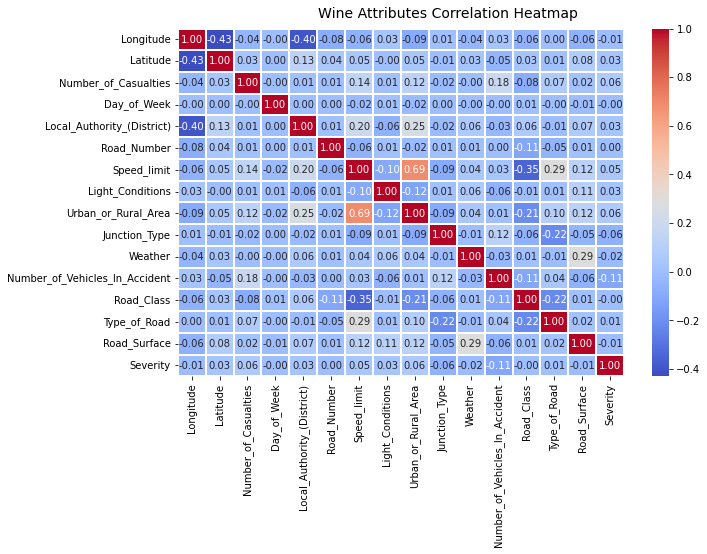

In [12]:
#accidentsUK
#personsUK
#vehiclesUK
#placesFR 
#personsFR 
#vehiclesFR 

f, ax = plt.subplots(figsize=(10, 6))
corr = accidentsUK.corr()
hm = sns.heatmap(round(corr,2), annot=True, ax=ax, cmap="coolwarm",fmt='.2f',
            linewidths=.05)
f.subplots_adjust(top=0.93)
t= f.suptitle('Wine Attributes Correlation Heatmap', fontsize=14)

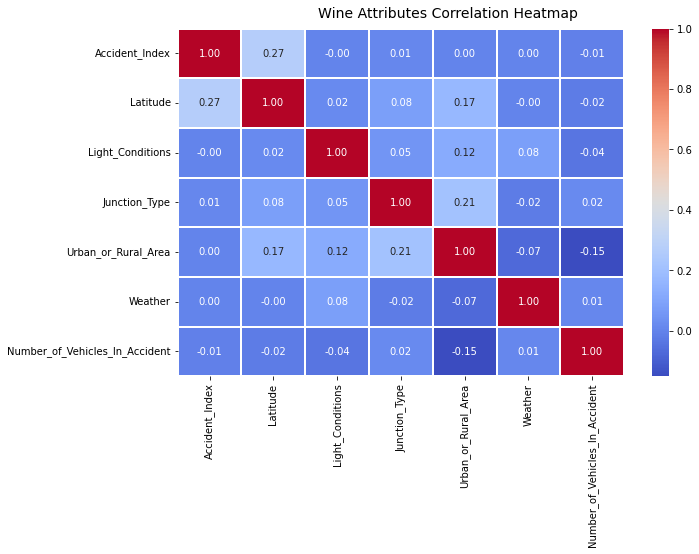

In [13]:
f, ax = plt.subplots(figsize=(10, 6))
corr = accidentsFR.corr()
hm = sns.heatmap(round(corr,2), annot=True, ax=ax, cmap="coolwarm",fmt='.2f',
            linewidths=.05)
f.subplots_adjust(top=0.93)
t= f.suptitle('Wine Attributes Correlation Heatmap', fontsize=14)

In [14]:
accidentsUK['Type_of_Road'].unique()

array([ 2.,  3.,  1., -1.])